## 1. Import Library

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score


import warnings
warnings.filterwarnings('ignore')

## 2. Import Dataset

In [28]:
resume_data = pd.read_csv("/content/Cleaned_Resumes.csv")
resume_data.head()

,Category,Resume_Details
0,PeopleSoft,peoplesoft administrator srinivas experience s...
1,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...
2,PeopleSoft,profile summary years experience implementing ...
3,PeopleSoft,classification internal classification interna...
4,PeopleSoft,vinod akkala peoplesoft dba admin professional...


## 3. Data Preprocessing
### 3.1 LabelEncoder

In [29]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
resume_data["LebelEncoding"]=Encoder.fit_transform(resume_data ["Category"])

resume_data

,Category,Resume_Details,LebelEncoding
0,PeopleSoft,peoplesoft administrator srinivas experience s...,1
1,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...,1
2,PeopleSoft,profile summary years experience implementing ...,1
3,PeopleSoft,classification internal classification interna...,1
4,PeopleSoft,vinod akkala peoplesoft dba admin professional...,1
...,...,...,...
74,Workday,pic pic years experience workday hcm technical...,4
75,Workday,srikanth workday hcm consultant seeking suitab...,4
76,Workday,ramesh workday hcm consultant professional sum...,4
77,Internship,name ravali curriculum vitae specialization co...,0


In [30]:
resume_data.describe()

,LebelEncoding
count,79.000000
mean,2.405063
std,1.203829
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,4.000000


In [31]:
resume_data.isnull().sum()

,0
Category,0
Resume_Details,0
LebelEncoding,0


## 4. Model Building

### 4.1 Train - Test Split

In [32]:
x = resume_data['Resume_Details'].values
y = resume_data['Category'].values

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=45, test_size=0.25,stratify=y)
x_train.shape, x_test.shape

((59,), (20,))

### 4.2 TF-IDF Vectorization

In [34]:
tfidf_vector = TfidfVectorizer(sublinear_tf=True,stop_words='english')

In [35]:
x_train = tfidf_vector.fit_transform(x_train)
x_test = tfidf_vector.transform(x_test)

In [36]:
x_train.shape, x_test.shape

((59, 3818), (20, 3818))

In [37]:
print(y_train),print(y_test)

['PeopleSoft' 'React JS Developer' 'Internship' 'Workday' 'SQL Developer'
 'SQL Developer' 'React JS Developer' 'PeopleSoft' 'React JS Developer'
 'PeopleSoft' 'React JS Developer' 'SQL Developer' 'React JS Developer'
 'PeopleSoft' 'Workday' 'React JS Developer' 'SQL Developer'
 'React JS Developer' 'Internship' 'React JS Developer'
 'React JS Developer' 'Workday' 'PeopleSoft' 'PeopleSoft' 'PeopleSoft'
 'SQL Developer' 'Workday' 'Workday' 'Workday' 'React JS Developer'
 'Workday' 'PeopleSoft' 'SQL Developer' 'Workday' 'React JS Developer'
 'Workday' 'SQL Developer' 'Workday' 'PeopleSoft' 'PeopleSoft'
 'SQL Developer' 'PeopleSoft' 'Workday' 'SQL Developer' 'PeopleSoft'
 'Workday' 'PeopleSoft' 'SQL Developer' 'Workday' 'Workday' 'Workday'
 'PeopleSoft' 'React JS Developer' 'React JS Developer'
 'React JS Developer' 'PeopleSoft' 'React JS Developer'
 'React JS Developer' 'Workday']
['PeopleSoft' 'PeopleSoft' 'React JS Developer' 'Workday' 'Workday'
 'React JS Developer' 'React JS Develope

(None, None)

# 5. Classification Models

## 5.1 KNN Classifier

In [38]:
model_knn = KNeighborsClassifier(n_neighbors=41)
model_knn.fit(x_train, y_train)
y_pred = model_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_knn.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_knn.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_knn,classification_report(y_test, y_pred)))
nb_score = model_knn.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_knn = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_knn = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_knn = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_knn = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.63
Accuracy of  test set    : 0.65
Classification report for classifier KNeighborsClassifier(n_neighbors=41):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      0.40      0.57         5
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       0.00      0.00      0.00         4
           Workday       0.42      1.00      0.59         5

          accuracy                           0.65        20
         macro avg       0.60      0.60      0.54        20
      weighted avg       0.65      0.65      0.59        20




## 5.2 Decision Tree Classifier

In [39]:
model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(x_train, y_train)
y_pred = model_DT.predict(x_test)
accuracy_DT = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_DT.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_DT.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_DT,classification_report(y_test, y_pred)))
nb_score = model_DT.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_DT = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_DT= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_DT = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.90
Classification report for classifier DecisionTreeClassifier():
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         5
React JS Developer       0.75      1.00      0.86         6
     SQL Developer       1.00      0.50      0.67         4
           Workday       1.00      1.00      1.00         5

          accuracy                           0.90        20
         macro avg       0.94      0.88      0.88        20
      weighted avg       0.93      0.90      0.89        20




## 5.3 Random Forest Classifier

In [40]:
model_RF = RandomForestClassifier(n_estimators=200)
model_RF.fit(x_train, y_train)
y_pred = model_RF.predict(x_test)
accuracy_RF = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_RF.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_RF.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_RF,classification_report(y_test, y_pred)))
nb_score = model_RF.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_RF = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_RF = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_RF = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_RF = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier RandomForestClassifier(n_estimators=200):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         5
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       1.00      1.00      1.00         4
           Workday       1.00      1.00      1.00         5

          accuracy                           1.00        20
         macro avg       1.00      1.00      1.00        20
      weighted avg       1.00      1.00      1.00        20




## 5.4 Support Vectore Machine (SVM) Classifier

In [41]:
model_svm = SVC()
model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_svm.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_svm.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_svm,classification_report(y_test, y_pred)))
nb_score = model_svm.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_svm = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_svm = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_svm = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.98
Accuracy of  test set    : 1.00
Classification report for classifier SVC():
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         5
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       1.00      1.00      1.00         4
           Workday       1.00      1.00      1.00         5

          accuracy                           1.00        20
         macro avg       1.00      1.00      1.00        20
      weighted avg       1.00      1.00      1.00        20




## 5.5 Logistic Regression

In [42]:
model_lgr = LogisticRegression()
model_lgr.fit(x_train, y_train)
y_pred = model_lgr.predict(x_test)
accuracy_lgr = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_lgr.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_lgr.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_lgr,classification_report(y_test, y_pred)))
nb_score = model_lgr.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_lgr = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_lgr = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_lgr = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_lgr = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.97
Accuracy of  test set    : 1.00
Classification report for classifier LogisticRegression():
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         5
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       1.00      1.00      1.00         4
           Workday       1.00      1.00      1.00         5

          accuracy                           1.00        20
         macro avg       1.00      1.00      1.00        20
      weighted avg       1.00      1.00      1.00        20




## 5.6 Bagging Classifier

In [43]:
model_bagg = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
model_bagg.fit(x_train, y_train)
y_pred = model_bagg.predict(x_test)
accuracy_bagg = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_bagg.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_bagg.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_bagg,classification_report(y_test, y_pred)))
nb_score = model_bagg.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_bagg = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_bagg = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_bagg = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_bagg = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.93
Accuracy of  test set    : 0.95
Classification report for classifier BaggingClassifier(estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      0.80      0.89         5
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       1.00      1.00      1.00         4
           Workday       0.83      1.00      0.91         5

          accuracy                           0.95        20
         macro avg       0.96      0.95      0.95        20
      weighted avg       0.96      0.95      0.95        20




## 5.7 AdaBoost Classifier

In [44]:
model_Adaboost = AdaBoostClassifier(n_estimators=100)
model_Adaboost.fit(x_train, y_train)
y_pred = model_Adaboost.predict(x_test)
accuracy_Adaboost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_Adaboost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_Adaboost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_Adaboost,classification_report(y_test, y_pred)))
nb_score = model_Adaboost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Adaboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Adaboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Adaboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Adaboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 0.97
Accuracy of  test set    : 0.95
Classification report for classifier AdaBoostClassifier(n_estimators=100):
                    precision    recall  f1-score   support

        PeopleSoft       0.83      1.00      0.91         5
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       1.00      1.00      1.00         4
           Workday       1.00      0.80      0.89         5

          accuracy                           0.95        20
         macro avg       0.96      0.95      0.95        20
      weighted avg       0.96      0.95      0.95        20




## 5.8 Gradient Boosting Classifier

In [45]:
model_GradientBoost = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,max_depth=1, random_state=0)
model_GradientBoost.fit(x_train, y_train)
y_pred = model_GradientBoost.predict(x_test)
accuracy_GradientBoost = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_GradientBoost.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_GradientBoost.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_GradientBoost,classification_report(y_test, y_pred)))
nb_score = model_GradientBoost.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_Gradientboost = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_Gradientboost = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_Gradientboost = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_Gradientboost = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         5
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       1.00      1.00      1.00         4
           Workday       1.00      1.00      1.00         5

          accuracy                           1.00        20
         macro avg       1.00      1.00      1.00        20
      weighted avg       1.00      1.00      1.00        20




## 5.9 Naive Bayes Classifier

In [46]:
model_NB =MultinomialNB(alpha=1, fit_prior=False, class_prior=None)
model_NB.fit(x_train, y_train)
y_pred = model_NB.predict(x_test)
accuracy_NB = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_NB.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_NB.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_NB,classification_report(y_test, y_pred)))
nb_score = model_NB.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_NB = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_NB = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_NB = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_NB = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         5
React JS Developer       1.00      1.00      1.00         6
     SQL Developer       1.00      1.00      1.00         4
           Workday       1.00      1.00      1.00         5

          accuracy                           1.00        20
         macro avg       1.00      1.00      1.00        20
      weighted avg       1.00      1.00      1.00        20




## 6. Model Evaluation

In [47]:
Evaluation = {"Models":["KNN Classifier","DecisionTree Classifier","RandomForest Classifier","SVM Classifier",
                        "Logistic Regression","Bagging Classifier","AdaBoost Classifier","Gradient Boosting Classifier","Naive Bayes Classifier"],\
            "Train_Accuracy(%)":[model_knn.score(x_train, y_train),model_DT.score(x_train, y_train),model_RF.score(x_train, y_train),model_svm.score(x_train, y_train),model_lgr.score(x_train, y_train),
                                 model_bagg.score(x_train, y_train),model_Adaboost.score(x_train, y_train),model_GradientBoost.score(x_train, y_train), model_NB.score(x_train, y_train)],
            "Test_Accuracy(%)":[accuracy_knn,accuracy_DT,accuracy_RF,accuracy_svm,accuracy_lgr,accuracy_bagg,accuracy_Adaboost,accuracy_GradientBoost,accuracy_NB],\
            "Precision(%)":[precision_knn,precision_DT,precision_RF,precision_svm,precision_lgr,precision_bagg,precision_Adaboost,precision_Gradientboost,precision_NB],\
            "Recall(%)":[recall_knn,recall_DT,recall_RF,recall_svm,recall_lgr,recall_bagg,recall_Adaboost,recall_Gradientboost,recall_NB],\
            "F1-Score(%)":[f1_knn,f1_DT,f1_RF,f1_svm,f1_lgr,f1_bagg,f1_Adaboost,f1_Gradientboost,f1_NB]}
table = pd.DataFrame(Evaluation)
table

,Models,Train_Accuracy(%),Test_Accuracy(%),Precision(%),Recall(%),F1-Score(%)
0,KNN Classifier,0.627119,0.65,0.60,0.60,0.54
1,DecisionTree Classifier,1.000000,0.90,0.94,0.88,0.88
2,RandomForest Classifier,1.000000,1.00,1.00,1.00,1.00
3,SVM Classifier,0.983051,1.00,1.00,1.00,1.00
4,Logistic Regression,0.966102,1.00,1.00,1.00,1.00
5,Bagging Classifier,0.932203,0.95,0.96,0.95,0.95
6,AdaBoost Classifier,0.966102,0.95,0.96,0.95,0.95
7,Gradient Boosting Classifier,1.000000,1.00,1.00,1.00,1.00
8,Naive Bayes Classifier,1.000000,1.00,1.00,1.00,1.00


In [48]:
model_names = ["KNN","DecisionTree","RandomForest ","SVM ", "Logistic Regression",
               "Bagging","AdaBoost","Gradient Boosting ","Naive Bayes"]
Test_accuracies = [accuracy_knn*100,accuracy_DT*100,accuracy_RF*100,
              accuracy_svm*100,accuracy_lgr*100,accuracy_bagg*100,
              accuracy_Adaboost*100,accuracy_GradientBoost*100,accuracy_NB*100]
Train_accuracies=[model_knn.score(x_train, y_train)*100,model_DT.score(x_train, y_train)*100,
                  model_RF.score(x_train, y_train)*100,model_svm.score(x_train, y_train)*100,
                  model_lgr.score(x_train, y_train)*100,model_bagg.score(x_train, y_train)*100,
                  model_Adaboost.score(x_train, y_train)*100,model_GradientBoost.score(x_train, y_train)*100,
                  model_NB.score(x_train, y_train)*100]

### 6.1 Train and Test Accuracy Plot

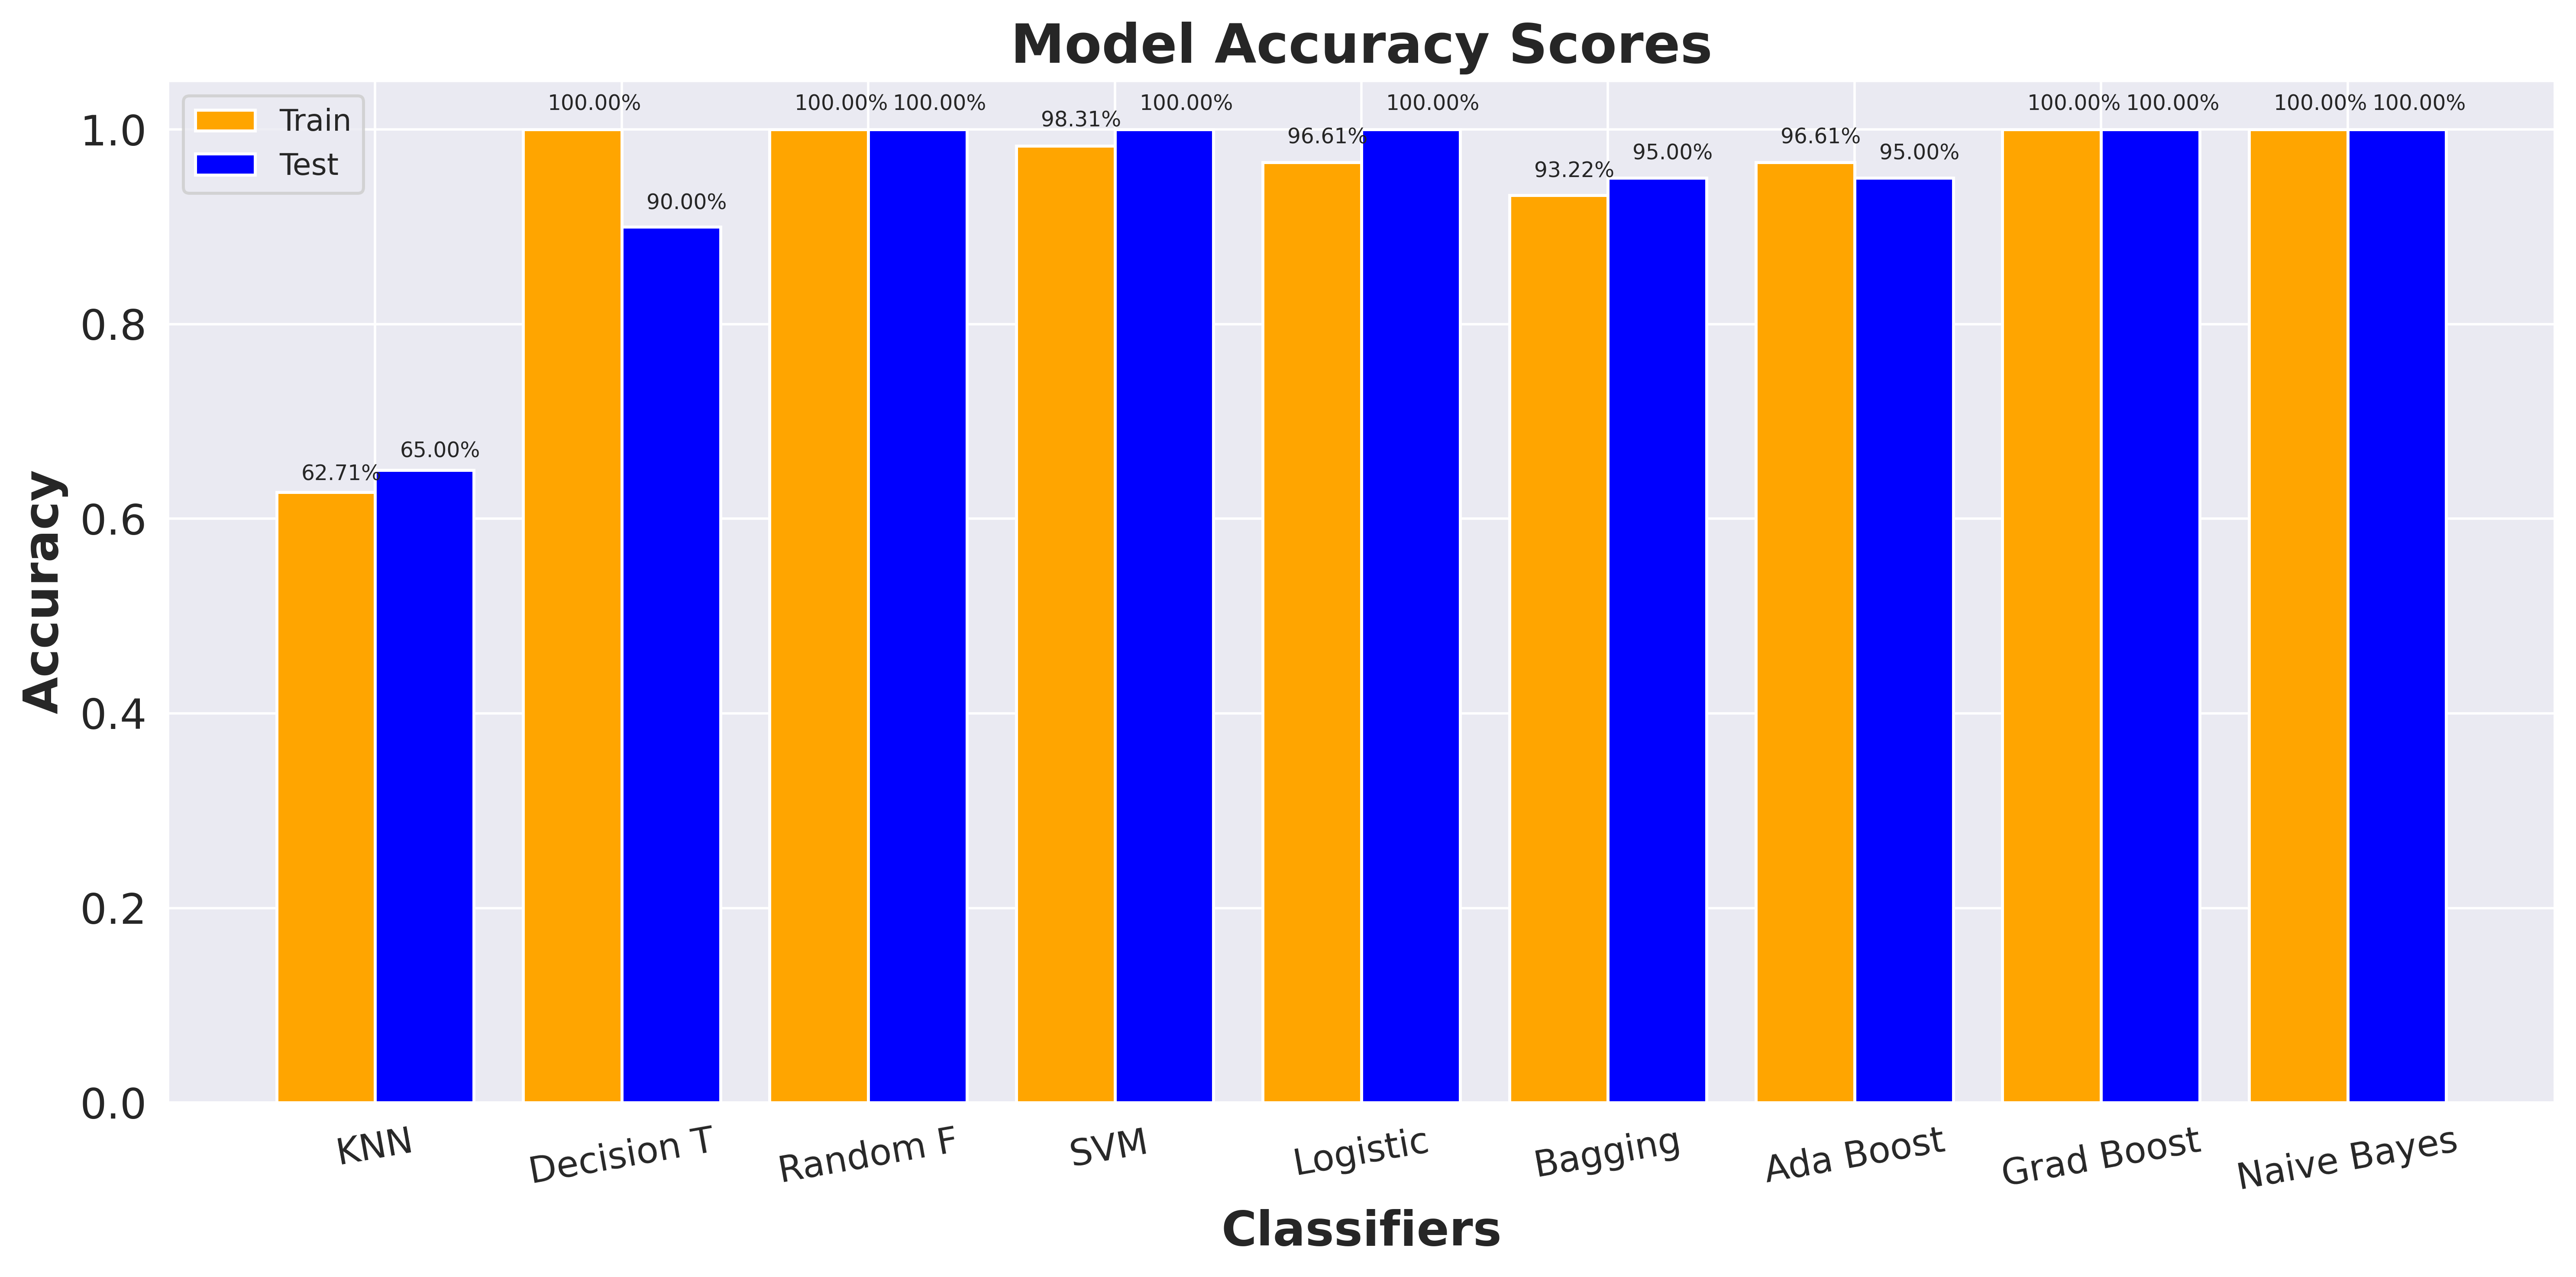

In [49]:
import matplotlib.pyplot as plt
import numpy as np

rcParams = {'xtick.labelsize':'12','ytick.labelsize':'14','axes.labelsize':'16'}
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=500)
x_pos = np.arange(len(table))
model_names = ["KNN", "Decision T", "Random F", "SVM ", "Logistic", "Bagging", "Ada Boost", "Grad Boost","Naive Bayes"]

bar1 = plt.bar(x_pos - 0.2, table['Train_Accuracy(%)'], width=0.4, label='Train', color= "Orange")
bar2 = plt.bar(x_pos + 0.2, table['Test_Accuracy(%)'], width=0.4, label='Test', color= "b")
plt.xticks(x_pos, model_names)

plt.xlabel("Classifiers", fontsize = 16, fontweight = 'bold')
plt.ylabel("Accuracy", fontsize = 16, fontweight = 'bold')
plt.title("Model Accuracy Scores", fontsize = 18, fontweight = 'bold')
plt.xticks(rotation = 10)
plt.legend()

for i, bar in enumerate(bar1):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02,
             s = '{:.2f}%'.format(Train_accuracies[i]), fontsize = 7)

for i, bar in enumerate(bar2):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, bar.get_height()*1.02,
             s = '{:.2f}%'.format(Test_accuracies[i]), fontsize = 7)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()


## 7. Model Deployment

### 7.1 Pickle File

In [50]:
import pickle
filename = 'modelDT2.pkl'
pickle.dump(model_DT,open(filename,'wb'))

In [51]:
import pickle
filename = 'vector2.pkl'
pickle.dump(tfidf_vector,open(filename,'wb'))

# THE END !!